In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import OrderedDict
import itertools

In [19]:
from sklearn.metrics import confusion_matrix

## Read Data

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
# Link for downloading dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df = pd.read_csv('iris.data.txt', header = None, names = column_names)

In [4]:
classes = df['class'].unique()

## One Hot Encoding of Labels

In [5]:
# create dictionary to convert labels to index and index to labels.
label_to_idx, idx_to_label = {}, {}
for i, c in enumerate(df['class'].unique()):
    label_to_idx[c] = i
    idx_to_label[i] = c

In [6]:
def get_encoded(y):
    """Encodes the labels as one hot encoding.
    First create an array of zeros of shape (total_samples, num_classes).
    For every sample, set the value 1 at the index value of class and rest will be zero.
    
    Parameter
    ---------
    y: np.array, shape = (total_samples, 1)
    
    Output
    ------
    encoded: np.array, shape = (total_samples, num_classes)
    """
    classes = df['class'].unique()
    
    # creates array of value zero
    encoded = np.zeros((y.shape[0], len(classes)))
    
    # encode
    for i, label in enumerate(y):
        encoded[i][label_to_idx[label]] = 1
    
    return encoded

## Divide into train and test data set

In [7]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

In [8]:
train, test = df[df['is_train'] == True], df[df['is_train'] == False]

In [9]:
print('length of train dataset: %d' %(len(train)))
print('length of test dataset: %d' %(len(test)))

length of train dataset: 109
length of test dataset: 41


In [10]:
train_x = train[train.columns[:len(train.columns) - 2]]
ones = np.ones((train_x.shape[0], 1))
train_x_ones = np.concatenate((ones, train_x), axis = 1)
train_y = get_encoded(train['class'])

In [11]:
test_x = test[test.columns[:len(test.columns) - 2]]
ones = np.ones((test_x.shape[0], 1))
test_x_ones = np.concatenate((ones, test_x), axis = 1)
test_y = test['class']

## Logistic Regression

In [12]:
def sigmoid(score):
    return 1/(1 + np.exp(-score))

In [27]:
def get_cost(train_y, predict_y):
    cost = ((-train_y * np.log(predict_y)) - (1 - train_y) * np.log(1 - predict_y)).mean()
    #cost = 1/(train_y.shape[0]) * cost
    return cost

In [14]:
def get_pred(pred_ind, n_classes):
    result = []
    for ind in pred_ind:
        res = np.zeros((n_classes))
        res[ind] = 1
        result.append(res)
    
    return np.array(result)

In [15]:
def linear_reg(train_x, train_y, lr=0.0001, epochs=1, n_classes = 3):
    ones = np.ones((train_x.shape[0], 1))
    train_x_ones = np.concatenate((ones, train_x), axis = 1)
    w = np.zeros((train_x_ones.shape[1], n_classes))
    itr = 0
    while itr < epochs:
        score = np.dot(train_x_ones, w)
        predict_y = sigmoid(score)
        cost = get_cost(train_y, predict_y)
        pred_index = np.argmax(predict_y, axis = 1)
        predict_y = get_pred(pred_index, n_classes)
        gradient = np.dot(np.transpose(train_x_ones), (predict_y - train_y))
        w = w - lr * gradient
        print("Itr: {}, loss: {}".format(itr, cost))
        itr += 1
    predict = np.dot(train_x_ones, w)
    return w

In [40]:
model = linear_reg(train_x, train_y, epochs = 10000)

Itr: 0, loss: 0.69314718056
Itr: 1, loss: 0.681255070593
Itr: 2, loss: 0.693168893932
Itr: 3, loss: 0.677082474491
Itr: 4, loss: 0.692242991176
Itr: 5, loss: 0.685768977981
Itr: 6, loss: 0.681023312848
Itr: 7, loss: 0.678604338831
Itr: 8, loss: 0.687698873122
Itr: 9, loss: 0.667814318064
Itr: 10, loss: 0.666773583193
Itr: 11, loss: 0.668569458162
Itr: 12, loss: 0.679064752812
Itr: 13, loss: 0.67239297943
Itr: 14, loss: 0.677178229925
Itr: 15, loss: 0.668031122758
Itr: 16, loss: 0.67225891905
Itr: 17, loss: 0.668031610172
Itr: 18, loss: 0.670050586939
Itr: 19, loss: 0.671834222718
Itr: 20, loss: 0.666732300582
Itr: 21, loss: 0.669459666234
Itr: 22, loss: 0.666820952759
Itr: 23, loss: 0.674149844358
Itr: 24, loss: 0.666246735005
Itr: 25, loss: 0.67128251163
Itr: 26, loss: 0.666067043083
Itr: 27, loss: 0.668892833344
Itr: 28, loss: 0.66725862679
Itr: 29, loss: 0.676613996698
Itr: 30, loss: 0.672562700964
Itr: 31, loss: 0.666976477698
Itr: 32, loss: 0.672455040696
Itr: 33, loss: 0.66363934

Itr: 430, loss: 0.643552747361
Itr: 431, loss: 0.643191895318
Itr: 432, loss: 0.643740192681
Itr: 433, loss: 0.642845883865
Itr: 434, loss: 0.643648704159
Itr: 435, loss: 0.643284515487
Itr: 436, loss: 0.643550449958
Itr: 437, loss: 0.643461490502
Itr: 438, loss: 0.643732166581
Itr: 439, loss: 0.643098524341
Itr: 440, loss: 0.643922815483
Itr: 441, loss: 0.642499572764
Itr: 442, loss: 0.643527707712
Itr: 443, loss: 0.643800062229
Itr: 444, loss: 0.642643826502
Itr: 445, loss: 0.643426991541
Itr: 446, loss: 0.643696510788
Itr: 447, loss: 0.643065657834
Itr: 448, loss: 0.643886368967
Itr: 449, loss: 0.642469531127
Itr: 450, loss: 0.643788751999
Itr: 451, loss: 0.642634380457
Itr: 452, loss: 0.643416261296
Itr: 453, loss: 0.643685365674
Itr: 454, loss: 0.643055513727
Itr: 455, loss: 0.643874941117
Itr: 456, loss: 0.642460401448
Itr: 457, loss: 0.643777469925
Itr: 458, loss: 0.642624962618
Itr: 459, loss: 0.643405559224
Itr: 460, loss: 0.643674248722
Itr: 461, loss: 0.643310036175
Itr: 462

Itr: 853, loss: 0.643776381093
Itr: 854, loss: 0.643418375372
Itr: 855, loss: 0.643679852061
Itr: 856, loss: 0.643948531691
Itr: 857, loss: 0.642808901386
Itr: 858, loss: 0.643580672695
Itr: 859, loss: 0.643846515691
Itr: 860, loss: 0.643224592472
Itr: 861, loss: 0.644033926644
Itr: 862, loss: 0.642637559963
Itr: 863, loss: 0.643937640855
Itr: 864, loss: 0.642799876263
Itr: 865, loss: 0.643570362333
Itr: 866, loss: 0.643835790116
Itr: 867, loss: 0.643476110508
Itr: 868, loss: 0.643738801107
Itr: 869, loss: 0.643730591003
Itr: 870, loss: 0.64400020661
Itr: 871, loss: 0.642610273473
Itr: 872, loss: 0.643904326923
Itr: 873, loss: 0.643024045381
Itr: 874, loss: 0.643814328732
Itr: 875, loss: 0.643455762122
Itr: 876, loss: 0.643717646737
Itr: 877, loss: 0.643986734408
Itr: 878, loss: 0.642599725373
Itr: 879, loss: 0.643891039697
Itr: 880, loss: 0.6432673576
Itr: 881, loss: 0.644078954996
Itr: 882, loss: 0.642678547165
Itr: 883, loss: 0.643982416148
Itr: 884, loss: 0.642595916222
Itr: 885, l

Itr: 1338, loss: 0.643472929669
Itr: 1339, loss: 0.644271730136
Itr: 1340, loss: 0.642894340778
Itr: 1341, loss: 0.644176684916
Itr: 1342, loss: 0.642813210138
Itr: 1343, loss: 0.644082517332
Itr: 1344, loss: 0.643469098193
Itr: 1345, loss: 0.643994065606
Itr: 1346, loss: 0.643985981784
Itr: 1347, loss: 0.643977908759
Itr: 1348, loss: 0.643969846532
Itr: 1349, loss: 0.643961795102
Itr: 1350, loss: 0.644227721106
Itr: 1351, loss: 0.642858364792
Itr: 1352, loss: 0.644133183054
Itr: 1353, loss: 0.643265710052
Itr: 1354, loss: 0.644044557635
Itr: 1355, loss: 0.643691124385
Itr: 1356, loss: 0.643949315501
Itr: 1357, loss: 0.644214713177
Itr: 1358, loss: 0.642848283086
Itr: 1359, loss: 0.644120360243
Itr: 1360, loss: 0.643505654803
Itr: 1361, loss: 0.644031724124
Itr: 1362, loss: 0.644023620337
Itr: 1363, loss: 0.644015527348
Itr: 1364, loss: 0.644007445156
Itr: 1365, loss: 0.643999373762
Itr: 1366, loss: 0.643991313165
Itr: 1367, loss: 0.643983263366
Itr: 1368, loss: 0.643975224365
Itr: 136

Itr: 1830, loss: 0.643674203087
Itr: 1831, loss: 0.643929267709
Itr: 1832, loss: 0.644191541841
Itr: 1833, loss: 0.642842545761
Itr: 1834, loss: 0.644098334751
Itr: 1835, loss: 0.642998999765
Itr: 1836, loss: 0.644280799806
Itr: 1837, loss: 0.642917963038
Itr: 1838, loss: 0.644186720668
Itr: 1839, loss: 0.642837804591
Itr: 1840, loss: 0.644093519564
Itr: 1841, loss: 0.642994249439
Itr: 1842, loss: 0.644018209347
Itr: 1843, loss: 0.643669341491
Itr: 1844, loss: 0.64392424961
Itr: 1845, loss: 0.644186367312
Itr: 1846, loss: 0.642838239236
Itr: 1847, loss: 0.644093216325
Itr: 1848, loss: 0.642994585436
Itr: 1849, loss: 0.644275573821
Itr: 1850, loss: 0.642913604934
Itr: 1851, loss: 0.644181550778
Itr: 1852, loss: 0.642833502719
Itr: 1853, loss: 0.644088405778
Itr: 1854, loss: 0.642989839761
Itr: 1855, loss: 0.644013142107
Itr: 1856, loss: 0.643664490567
Itr: 1857, loss: 0.643919242178
Itr: 1858, loss: 0.644181203443
Itr: 1859, loss: 0.642833943406
Itr: 1860, loss: 0.644088108562
Itr: 1861

Itr: 2269, loss: 0.644160461674
Itr: 2270, loss: 0.643814733661
Itr: 2271, loss: 0.64406738315
Itr: 2272, loss: 0.644327244323
Itr: 2273, loss: 0.642991704389
Itr: 2274, loss: 0.644234918613
Itr: 2275, loss: 0.643146500077
Itr: 2276, loss: 0.644160337875
Itr: 2277, loss: 0.644152457359
Itr: 2278, loss: 0.644144587649
Itr: 2279, loss: 0.644136728745
Itr: 2280, loss: 0.644128880648
Itr: 2281, loss: 0.644121043357
Itr: 2282, loss: 0.644113216873
Itr: 2283, loss: 0.644105401196
Itr: 2284, loss: 0.644097596325
Itr: 2285, loss: 0.644089802261
Itr: 2286, loss: 0.64434975707
Itr: 2287, loss: 0.643013703676
Itr: 2288, loss: 0.644257399229
Itr: 2289, loss: 0.643168564306
Itr: 2290, loss: 0.644438278792
Itr: 2291, loss: 0.643088380699
Itr: 2292, loss: 0.644345048639
Itr: 2293, loss: 0.643009075652
Itr: 2294, loss: 0.644252696812
Itr: 2295, loss: 0.643163927078
Itr: 2296, loss: 0.644178094455
Itr: 2297, loss: 0.643832455298
Itr: 2298, loss: 0.64408504169
Itr: 2299, loss: 0.644344839889
Itr: 2300, 

Itr: 2710, loss: 0.644173985884
Itr: 2711, loss: 0.643909283257
Itr: 2712, loss: 0.644160543615
Itr: 2713, loss: 0.643896365138
Itr: 2714, loss: 0.644147135006
Itr: 2715, loss: 0.643883480684
Itr: 2716, loss: 0.644133760058
Itr: 2717, loss: 0.644391253055
Itr: 2718, loss: 0.643068943438
Itr: 2719, loss: 0.644299789398
Itr: 2720, loss: 0.64299140882
Itr: 2721, loss: 0.644209204349
Itr: 2722, loss: 0.643619818732
Itr: 2723, loss: 0.644124389675
Itr: 2724, loss: 0.644381543286
Itr: 2725, loss: 0.643061113492
Itr: 2726, loss: 0.644290198963
Itr: 2727, loss: 0.642983698309
Itr: 2728, loss: 0.644199733258
Itr: 2729, loss: 0.643934638982
Itr: 2730, loss: 0.64418626787
Itr: 2731, loss: 0.64392169775
Itr: 2732, loss: 0.644172836143
Itr: 2733, loss: 0.643908790184
Itr: 2734, loss: 0.644159438076
Itr: 2735, loss: 0.643895916282
Itr: 2736, loss: 0.644146073671
Itr: 2737, loss: 0.644403444802
Itr: 2738, loss: 0.643081815711
Itr: 2739, loss: 0.644312025868
Itr: 2740, loss: 0.643004326051
Itr: 2741, 

Itr: 3097, loss: 0.64171680646
Itr: 3098, loss: 0.641710490463
Itr: 3099, loss: 0.641704180808
Itr: 3100, loss: 0.641697877494
Itr: 3101, loss: 0.641691580522
Itr: 3102, loss: 0.641685289891
Itr: 3103, loss: 0.641957919085
Itr: 3104, loss: 0.640551185191
Itr: 3105, loss: 0.641860958115
Itr: 3106, loss: 0.640970225066
Itr: 3107, loss: 0.641769859979
Itr: 3108, loss: 0.641487959492
Itr: 3109, loss: 0.641755108235
Itr: 3110, loss: 0.641473730685
Itr: 3111, loss: 0.641740390062
Itr: 3112, loss: 0.641459535453
Itr: 3113, loss: 0.641725705461
Itr: 3114, loss: 0.641719400444
Itr: 3115, loss: 0.641713101769
Itr: 3116, loss: 0.641706809436
Itr: 3117, loss: 0.641700523445
Itr: 3118, loss: 0.641973046523
Itr: 3119, loss: 0.640566906603
Itr: 3120, loss: 0.64187612441
Itr: 3121, loss: 0.640985761238
Itr: 3122, loss: 0.641785066629
Itr: 3123, loss: 0.641503281843
Itr: 3124, loss: 0.641770324358
Itr: 3125, loss: 0.641489062519
Itr: 3126, loss: 0.641755615658
Itr: 3127, loss: 0.641474876773
Itr: 3128,

Itr: 3496, loss: 0.642013407072
Itr: 3497, loss: 0.642007278291
Itr: 3498, loss: 0.642001155856
Itr: 3499, loss: 0.641995039769
Itr: 3500, loss: 0.641988930029
Itr: 3501, loss: 0.642256892839
Itr: 3502, loss: 0.640876163544
Itr: 3503, loss: 0.642161617344
Itr: 3504, loss: 0.641287067685
Itr: 3505, loss: 0.642072237506
Itr: 3506, loss: 0.641795386432
Itr: 3507, loss: 0.642057865536
Itr: 3508, loss: 0.641781537739
Itr: 3509, loss: 0.642043527161
Itr: 3510, loss: 0.64203738846
Itr: 3511, loss: 0.642031256105
Itr: 3512, loss: 0.642025130098
Itr: 3513, loss: 0.642019010438
Itr: 3514, loss: 0.642012897126
Itr: 3515, loss: 0.642006790161
Itr: 3516, loss: 0.642000689544
Itr: 3517, loss: 0.64226840035
Itr: 3518, loss: 0.640889072923
Itr: 3519, loss: 0.642173214927
Itr: 3520, loss: 0.641299537371
Itr: 3521, loss: 0.642083926201
Itr: 3522, loss: 0.641807346899
Itr: 3523, loss: 0.642069573869
Itr: 3524, loss: 0.641793517857
Itr: 3525, loss: 0.642055255134
Itr: 3526, loss: 0.642049125555
Itr: 3527,

Itr: 3880, loss: 0.641845522412
Itr: 3881, loss: 0.642097774275
Itr: 3882, loss: 0.642357233088
Itr: 3883, loss: 0.642084184296
Itr: 3884, loss: 0.642343153179
Itr: 3885, loss: 0.642070627938
Itr: 3886, loss: 0.642329106886
Itr: 3887, loss: 0.642323108859
Itr: 3888, loss: 0.642317117183
Itr: 3889, loss: 0.64231113186
Itr: 3890, loss: 0.642305152888
Itr: 3891, loss: 0.642299180268
Itr: 3892, loss: 0.642293214
Itr: 3893, loss: 0.642287254084
Itr: 3894, loss: 0.64228130052
Itr: 3895, loss: 0.642275353308
Itr: 3896, loss: 0.642539132417
Itr: 3897, loss: 0.641422576955
Itr: 3898, loss: 0.642725440846
Itr: 3899, loss: 0.641340089319
Itr: 3900, loss: 0.642629916246
Itr: 3901, loss: 0.641258479603
Itr: 3902, loss: 0.642535269289
Itr: 3903, loss: 0.641177747805
Itr: 3904, loss: 0.64244150001
Itr: 3905, loss: 0.641907261575
Itr: 3906, loss: 0.642160635803
Itr: 3907, loss: 0.642421217086
Itr: 3908, loss: 0.64188845271
Itr: 3909, loss: 0.642141124427
Itr: 3910, loss: 0.642401003269
Itr: 3911, loss

Itr: 4329, loss: 0.642373859632
Itr: 4330, loss: 0.642368069013
Itr: 4331, loss: 0.642362284751
Itr: 4332, loss: 0.642356506846
Itr: 4333, loss: 0.642350735297
Itr: 4334, loss: 0.642609984853
Itr: 4335, loss: 0.641513893781
Itr: 4336, loss: 0.642793178957
Itr: 4337, loss: 0.641202573449
Itr: 4338, loss: 0.642430282294
Itr: 4339, loss: 0.642424449321
Itr: 4340, loss: 0.642418622705
Itr: 4341, loss: 0.642412802445
Itr: 4342, loss: 0.642406988542
Itr: 4343, loss: 0.642401180996
Itr: 4344, loss: 0.642395379807
Itr: 4345, loss: 0.642389584974
Itr: 4346, loss: 0.642383796499
Itr: 4347, loss: 0.64237801438
Itr: 4348, loss: 0.642372238618
Itr: 4349, loss: 0.642366469214
Itr: 4350, loss: 0.642625699765
Itr: 4351, loss: 0.641293627232
Itr: 4352, loss: 0.642533581438
Itr: 4353, loss: 0.641758460251
Itr: 4354, loss: 0.64252318503
Itr: 4355, loss: 0.641999346578
Itr: 4356, loss: 0.64224780361
Itr: 4357, loss: 0.642503470994
Itr: 4358, loss: 0.641981107407
Itr: 4359, loss: 0.64222886155
Itr: 4360, l

Itr: 4815, loss: 0.640347899513
Itr: 4816, loss: 0.640616754594
Itr: 4817, loss: 0.640333538807
Itr: 4818, loss: 0.640601904675
Itr: 4819, loss: 0.640319211667
Itr: 4820, loss: 0.640587088316
Itr: 4821, loss: 0.640304918092
Itr: 4822, loss: 0.640572305517
Itr: 4823, loss: 0.640565953386
Itr: 4824, loss: 0.640559607594
Itr: 4825, loss: 0.640553268142
Itr: 4826, loss: 0.64054693503
Itr: 4827, loss: 0.640540608257
Itr: 4828, loss: 0.640534287824
Itr: 4829, loss: 0.640527973731
Itr: 4830, loss: 0.640521665977
Itr: 4831, loss: 0.640515364564
Itr: 4832, loss: 0.64050906949
Itr: 4833, loss: 0.640502780757
Itr: 4834, loss: 0.640496498363
Itr: 4835, loss: 0.640768545223
Itr: 4836, loss: 0.639614567228
Itr: 4837, loss: 0.6409605165
Itr: 4838, loss: 0.639529059291
Itr: 4839, loss: 0.640861988559
Itr: 4840, loss: 0.639444428121
Itr: 4841, loss: 0.640764337072
Itr: 4842, loss: 0.639610272766
Itr: 4843, loss: 0.640686348808
Itr: 4844, loss: 0.640133615133
Itr: 4845, loss: 0.640395722879
Itr: 4846, l

Itr: 5325, loss: 0.640942290517
Itr: 5326, loss: 0.640936288313
Itr: 5327, loss: 0.641200741614
Itr: 5328, loss: 0.640401087023
Itr: 5329, loss: 0.641189777833
Itr: 5330, loss: 0.640391205332
Itr: 5331, loss: 0.641178831278
Itr: 5332, loss: 0.640381340879
Itr: 5333, loss: 0.641167901952
Itr: 5334, loss: 0.640629110029
Itr: 5335, loss: 0.64088462579
Itr: 5336, loss: 0.641147344765
Itr: 5337, loss: 0.640610026031
Itr: 5338, loss: 0.640864839695
Itr: 5339, loss: 0.641126856641
Itr: 5340, loss: 0.640852998027
Itr: 5341, loss: 0.641114590885
Itr: 5342, loss: 0.641108469032
Itr: 5343, loss: 0.641102353526
Itr: 5344, loss: 0.641096244368
Itr: 5345, loss: 0.641090141556
Itr: 5346, loss: 0.641084045092
Itr: 5347, loss: 0.641077954975
Itr: 5348, loss: 0.641071871206
Itr: 5349, loss: 0.641065793784
Itr: 5350, loss: 0.641059722709
Itr: 5351, loss: 0.641053657982
Itr: 5352, loss: 0.641047599603
Itr: 5353, loss: 0.641041547571
Itr: 5354, loss: 0.641035501887
Itr: 5355, loss: 0.64102946255
Itr: 5356,

Itr: 5743, loss: 0.641462834649
Itr: 5744, loss: 0.641456925771
Itr: 5745, loss: 0.641451023245
Itr: 5746, loss: 0.641445127072
Itr: 5747, loss: 0.641439237252
Itr: 5748, loss: 0.641433353785
Itr: 5749, loss: 0.641427476671
Itr: 5750, loss: 0.641421605909
Itr: 5751, loss: 0.641415741501
Itr: 5752, loss: 0.641409883445
Itr: 5753, loss: 0.641404031743
Itr: 5754, loss: 0.641398186394
Itr: 5755, loss: 0.641392347398
Itr: 5756, loss: 0.641386514755
Itr: 5757, loss: 0.641380688466
Itr: 5758, loss: 0.64137486853
Itr: 5759, loss: 0.641369054947
Itr: 5760, loss: 0.641363247717
Itr: 5761, loss: 0.641357446841
Itr: 5762, loss: 0.641351652319
Itr: 5763, loss: 0.64134586415
Itr: 5764, loss: 0.641340082334
Itr: 5765, loss: 0.641334306872
Itr: 5766, loss: 0.641592741599
Itr: 5767, loss: 0.640812141302
Itr: 5768, loss: 0.641840373748
Itr: 5769, loss: 0.640475158339
Itr: 5770, loss: 0.641746126759
Itr: 5771, loss: 0.640634533704
Itr: 5772, loss: 0.641931677361
Itr: 5773, loss: 0.640318439918
Itr: 5774,

Itr: 6212, loss: 0.639127146344
Itr: 6213, loss: 0.639396755446
Itr: 6214, loss: 0.639390307664
Itr: 6215, loss: 0.639383866216
Itr: 6216, loss: 0.639377431102
Itr: 6217, loss: 0.639371002324
Itr: 6218, loss: 0.63936457988
Itr: 6219, loss: 0.639358163771
Itr: 6220, loss: 0.639351753998
Itr: 6221, loss: 0.639345350559
Itr: 6222, loss: 0.639338953455
Itr: 6223, loss: 0.639332562687
Itr: 6224, loss: 0.639326178253
Itr: 6225, loss: 0.639319800155
Itr: 6226, loss: 0.639313428392
Itr: 6227, loss: 0.639307062965
Itr: 6228, loss: 0.639300703872
Itr: 6229, loss: 0.639294351116
Itr: 6230, loss: 0.639288004695
Itr: 6231, loss: 0.639281664609
Itr: 6232, loss: 0.639275330859
Itr: 6233, loss: 0.639269003444
Itr: 6234, loss: 0.639262682366
Itr: 6235, loss: 0.639256367623
Itr: 6236, loss: 0.639250059215
Itr: 6237, loss: 0.639243757144
Itr: 6238, loss: 0.639237461409
Itr: 6239, loss: 0.639231172009
Itr: 6240, loss: 0.639224888946
Itr: 6241, loss: 0.639495984789
Itr: 6242, loss: 0.63894091079
Itr: 6243,

Itr: 6578, loss: 0.639569388182
Itr: 6579, loss: 0.63956329768
Itr: 6580, loss: 0.639557213519
Itr: 6581, loss: 0.639822896187
Itr: 6582, loss: 0.639545081441
Itr: 6583, loss: 0.639810340374
Itr: 6584, loss: 0.639532974657
Itr: 6585, loss: 0.639797809852
Itr: 6586, loss: 0.639520893168
Itr: 6587, loss: 0.639785304619
Itr: 6588, loss: 0.639779053246
Itr: 6589, loss: 0.639772808215
Itr: 6590, loss: 0.639766569524
Itr: 6591, loss: 0.639760337174
Itr: 6592, loss: 0.639754111165
Itr: 6593, loss: 0.639747891496
Itr: 6594, loss: 0.639741678169
Itr: 6595, loss: 0.639735471182
Itr: 6596, loss: 0.639729270536
Itr: 6597, loss: 0.639723076232
Itr: 6598, loss: 0.639716888268
Itr: 6599, loss: 0.639710706646
Itr: 6600, loss: 0.639704531365
Itr: 6601, loss: 0.639698362425
Itr: 6602, loss: 0.639692199826
Itr: 6603, loss: 0.639686043569
Itr: 6604, loss: 0.639679893653
Itr: 6605, loss: 0.639673750078
Itr: 6606, loss: 0.639667612845
Itr: 6607, loss: 0.639661481954
Itr: 6608, loss: 0.639655357404
Itr: 6609

Itr: 6944, loss: 0.640033855363
Itr: 6945, loss: 0.640027906683
Itr: 6946, loss: 0.64002196435
Itr: 6947, loss: 0.640016028364
Itr: 6948, loss: 0.640010098725
Itr: 6949, loss: 0.640004175433
Itr: 6950, loss: 0.639998258487
Itr: 6951, loss: 0.639992347888
Itr: 6952, loss: 0.639986443637
Itr: 6953, loss: 0.639980545732
Itr: 6954, loss: 0.639974654175
Itr: 6955, loss: 0.639968768965
Itr: 6956, loss: 0.639962890102
Itr: 6957, loss: 0.639957017586
Itr: 6958, loss: 0.639951151417
Itr: 6959, loss: 0.639945291595
Itr: 6960, loss: 0.639939438121
Itr: 6961, loss: 0.640198811123
Itr: 6962, loss: 0.639927752191
Itr: 6963, loss: 0.640186701155
Itr: 6964, loss: 0.639916091577
Itr: 6965, loss: 0.640174616498
Itr: 6966, loss: 0.640168583026
Itr: 6967, loss: 0.640162555901
Itr: 6968, loss: 0.640156535122
Itr: 6969, loss: 0.64015052069
Itr: 6970, loss: 0.640144512605
Itr: 6971, loss: 0.640138510866
Itr: 6972, loss: 0.640132515474
Itr: 6973, loss: 0.640126526429
Itr: 6974, loss: 0.640120543731
Itr: 6975,

Itr: 7427, loss: 0.640423127026
Itr: 7428, loss: 0.640417443168
Itr: 7429, loss: 0.640411765664
Itr: 7430, loss: 0.640406094513
Itr: 7431, loss: 0.640400429715
Itr: 7432, loss: 0.640394771271
Itr: 7433, loss: 0.64038911918
Itr: 7434, loss: 0.640383473443
Itr: 7435, loss: 0.640377834059
Itr: 7436, loss: 0.640372201029
Itr: 7437, loss: 0.640625879761
Itr: 7438, loss: 0.640360936706
Itr: 7439, loss: 0.640614191076
Itr: 7440, loss: 0.640349697721
Itr: 7441, loss: 0.640868816229
Itr: 7442, loss: 0.640082425282
Itr: 7443, loss: 0.641118167964
Itr: 7444, loss: 0.639509466966
Itr: 7445, loss: 0.640751462917
Itr: 7446, loss: 0.639975057501
Itr: 7447, loss: 0.641293343942
Itr: 7448, loss: 0.639381436189
Itr: 7449, loss: 0.640602508272
Itr: 7450, loss: 0.640596688395
Itr: 7451, loss: 0.640590874871
Itr: 7452, loss: 0.6405850677
Itr: 7453, loss: 0.640579266881
Itr: 7454, loss: 0.640573472416
Itr: 7455, loss: 0.640567684304
Itr: 7456, loss: 0.640561902545
Itr: 7457, loss: 0.640556127139
Itr: 7458, 

Itr: 7933, loss: 0.638269948311
Itr: 7934, loss: 0.638263697372
Itr: 7935, loss: 0.638257452768
Itr: 7936, loss: 0.638251214497
Itr: 7937, loss: 0.638244982561
Itr: 7938, loss: 0.638238756958
Itr: 7939, loss: 0.63823253769
Itr: 7940, loss: 0.638226324756
Itr: 7941, loss: 0.638220118156
Itr: 7942, loss: 0.638488238445
Itr: 7943, loss: 0.638207761735
Itr: 7944, loss: 0.638475458666
Itr: 7945, loss: 0.638469059716
Itr: 7946, loss: 0.638462667099
Itr: 7947, loss: 0.638456280816
Itr: 7948, loss: 0.638449900866
Itr: 7949, loss: 0.638443527249
Itr: 7950, loss: 0.638437159965
Itr: 7951, loss: 0.638430799015
Itr: 7952, loss: 0.638424444399
Itr: 7953, loss: 0.638418096116
Itr: 7954, loss: 0.638411754167
Itr: 7955, loss: 0.638405418551
Itr: 7956, loss: 0.638399089269
Itr: 7957, loss: 0.638392766321
Itr: 7958, loss: 0.638386449707
Itr: 7959, loss: 0.638380139427
Itr: 7960, loss: 0.63837383548
Itr: 7961, loss: 0.638367537868
Itr: 7962, loss: 0.63836124659
Itr: 7963, loss: 0.638354961645
Itr: 7964, 

Itr: 8396, loss: 0.638677238344
Itr: 8397, loss: 0.63867114881
Itr: 8398, loss: 0.638665065616
Itr: 8399, loss: 0.638658988764
Itr: 8400, loss: 0.638652918254
Itr: 8401, loss: 0.638646854084
Itr: 8402, loss: 0.638640796257
Itr: 8403, loss: 0.63863474477
Itr: 8404, loss: 0.638628699626
Itr: 8405, loss: 0.638622660823
Itr: 8406, loss: 0.638616628361
Itr: 8407, loss: 0.638610602241
Itr: 8408, loss: 0.638604582463
Itr: 8409, loss: 0.638598569027
Itr: 8410, loss: 0.638592561933
Itr: 8411, loss: 0.638586561181
Itr: 8412, loss: 0.638849680594
Itr: 8413, loss: 0.638574593833
Itr: 8414, loss: 0.638837289494
Itr: 8415, loss: 0.638562651781
Itr: 8416, loss: 0.638824923686
Itr: 8417, loss: 0.638818743057
Itr: 8418, loss: 0.63881256877
Itr: 8419, loss: 0.638806400824
Itr: 8420, loss: 0.638800239219
Itr: 8421, loss: 0.638794083955
Itr: 8422, loss: 0.638787935033
Itr: 8423, loss: 0.638781792452
Itr: 8424, loss: 0.638775656212
Itr: 8425, loss: 0.638769526313
Itr: 8426, loss: 0.638763402756
Itr: 8427, 

Itr: 8883, loss: 0.639131625565
Itr: 8884, loss: 0.639125792971
Itr: 8885, loss: 0.639119966726
Itr: 8886, loss: 0.63911414683
Itr: 8887, loss: 0.639108333282
Itr: 8888, loss: 0.639102526083
Itr: 8889, loss: 0.639096725232
Itr: 8890, loss: 0.639090930731
Itr: 8891, loss: 0.639085142578
Itr: 8892, loss: 0.639079360774
Itr: 8893, loss: 0.639073585319
Itr: 8894, loss: 0.639067816213
Itr: 8895, loss: 0.639062053456
Itr: 8896, loss: 0.639056297048
Itr: 8897, loss: 0.63905054699
Itr: 8898, loss: 0.63904480328
Itr: 8899, loss: 0.63930116014
Itr: 8900, loss: 0.639033329182
Itr: 8901, loss: 0.639289261915
Itr: 8902, loss: 0.639283325498
Itr: 8903, loss: 0.63927739543
Itr: 8904, loss: 0.63927147171
Itr: 8905, loss: 0.639265554338
Itr: 8906, loss: 0.639259643314
Itr: 8907, loss: 0.639253738639
Itr: 8908, loss: 0.639247840313
Itr: 8909, loss: 0.639241948335
Itr: 8910, loss: 0.639236062705
Itr: 8911, loss: 0.639230183425
Itr: 8912, loss: 0.639224310492
Itr: 8913, loss: 0.639218443909
Itr: 8914, los

Itr: 9361, loss: 0.63639057871
Itr: 9362, loss: 0.636384244732
Itr: 9363, loss: 0.636377917084
Itr: 9364, loss: 0.636371595768
Itr: 9365, loss: 0.636365280782
Itr: 9366, loss: 0.636358972126
Itr: 9367, loss: 0.636352669801
Itr: 9368, loss: 0.636346373807
Itr: 9369, loss: 0.636340084144
Itr: 9370, loss: 0.636333800812
Itr: 9371, loss: 0.636327523811
Itr: 9372, loss: 0.63632125314
Itr: 9373, loss: 0.636314988801
Itr: 9374, loss: 0.636308730793
Itr: 9375, loss: 0.636302479115
Itr: 9376, loss: 0.636296233769
Itr: 9377, loss: 0.636289994754
Itr: 9378, loss: 0.636558823892
Itr: 9379, loss: 0.636552379992
Itr: 9380, loss: 0.636545942422
Itr: 9381, loss: 0.636539511182
Itr: 9382, loss: 0.636533086273
Itr: 9383, loss: 0.636526667694
Itr: 9384, loss: 0.636520255445
Itr: 9385, loss: 0.636513849526
Itr: 9386, loss: 0.636507449938
Itr: 9387, loss: 0.63650105668
Itr: 9388, loss: 0.636494669753
Itr: 9389, loss: 0.636488289156
Itr: 9390, loss: 0.63648191489
Itr: 9391, loss: 0.636475546955
Itr: 9392, l

Itr: 9871, loss: 0.636999410131
Itr: 9872, loss: 0.636993226593
Itr: 9873, loss: 0.636987049394
Itr: 9874, loss: 0.636980878534
Itr: 9875, loss: 0.636974714011
Itr: 9876, loss: 0.636968555828
Itr: 9877, loss: 0.636962403982
Itr: 9878, loss: 0.636956258476
Itr: 9879, loss: 0.636950119308
Itr: 9880, loss: 0.636943986479
Itr: 9881, loss: 0.636937859988
Itr: 9882, loss: 0.636931739837
Itr: 9883, loss: 0.636925626024
Itr: 9884, loss: 0.63691951855
Itr: 9885, loss: 0.636913417415
Itr: 9886, loss: 0.636907322619
Itr: 9887, loss: 0.636901234163
Itr: 9888, loss: 0.636895152045
Itr: 9889, loss: 0.636889076266
Itr: 9890, loss: 0.636883006827
Itr: 9891, loss: 0.636876943727
Itr: 9892, loss: 0.636870886966
Itr: 9893, loss: 0.636864836544
Itr: 9894, loss: 0.636858792462
Itr: 9895, loss: 0.636852754719
Itr: 9896, loss: 0.636846723316
Itr: 9897, loss: 0.636840698252
Itr: 9898, loss: 0.636834679527
Itr: 9899, loss: 0.636828667143
Itr: 9900, loss: 0.636822661098
Itr: 9901, loss: 0.636816661392
Itr: 9902

In [17]:
def get_predicted_class(predicted):
    predicted_class = [classes[np.where(p == 1)] for p in predicted]
    return np.array(predicted_class)

In [41]:
pred_score = np.dot(test_x_ones, model)
pred_index = np.argmax(pred_score, axis = 1)
pred_y = get_pred(pred_index, n_classes=3)
pred = get_predicted_class(pred_y)

In [42]:
cm = confusion_matrix(test_y.values, pred, labels = classes)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[17  0  0]
 [ 0 13  0]
 [ 0  0 11]]


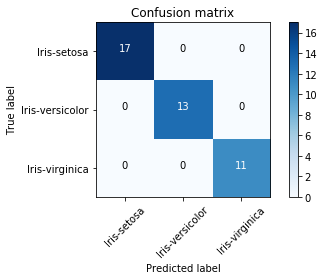

In [43]:
plt.figure()
plot_confusion_matrix(cm, classes)
plt.show()